In [64]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('git_log_processed.csv')

# Display the first few rows of the DataFrame
df.head()

,hash,release,message,timestamp,author,change_type
0,ee1d06c8fa1f0a6bf2e6ffb189c15266bbbd1d76,(tag: 19.0.0),release: cut the v19.0.0-rc.0 release,2024-10-30 19:59:28+00:00,Alex Rickabaugh,release
1,48eac2320d66bca2b07d29f65b15636f4abadb50,(tag: 18.2.10),release: cut the v18.2.10 release,2024-10-30 19:03:32+00:00,Alex Rickabaugh,release
2,dcd16b43f31177a269317f7764ef38559b14fd66,(tag: 18.2.10),refactor(migrations): Make the explicit standa...,2024-10-29 22:04:20+00:00,Matthieu Riegler,refactor
3,69dce38e778cb4c15aa06347031765a84e3ac6a5,(tag: 18.2.10),Revert fix(compiler): transform pseudo selecto...,2024-10-29 21:47:17+00:00,Matthieu Riegler,fix
4,d504452e2f193d3b494a0b2944cddb028c0a2231,(tag: 18.2.10),fix(migrations): properly replace imports acro...,2024-10-29 17:07:01+00:00,Pawel Kozlowski,fix


In [65]:
# Display number of comits by author
df['author'].value_counts()

George Kalpakas      1622
Paul Gschwendtner    1366
Pete Bacon Darwin    1068
Alex Rickabaugh       981
Andrew Kushnir        972
                     ... 
Prashant Tholia         1
Wojciech                1
Oscar Rosner            1
Benjamin Qin            1
sumitknoldus            1
Name: author, Length: 1899, dtype: int64

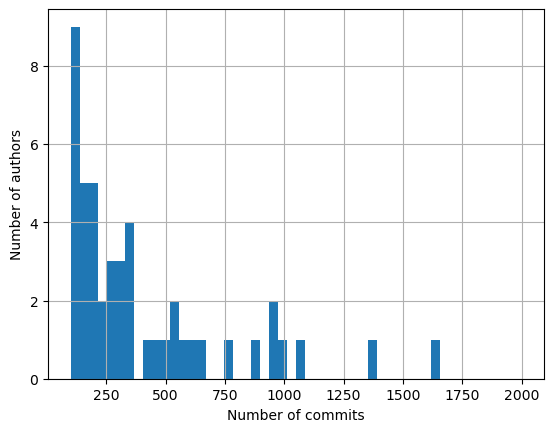

In [66]:
import matplotlib.pyplot as plt

# Plot histogram of commit counts count from 100 to 2000
df['author'].value_counts().hist(range=(100, 2000), bins=50)
plt.xlabel('Number of commits')
plt.ylabel('Number of authors')
plt.show()

In [67]:
#remove users that have less theb 100 commits
df = df.groupby('author').filter(lambda x: len(x) >= 100)
#show how many users are left
df['author'].value_counts().count()

47

In [68]:
# Group by author and change_type, then count the occurrences
grouped_df = df.groupby(['author', 'change_type']).size().reset_index(name='count')

# # Display the grouped DataFrame of Alex Rickabaugh
# grouped_df[grouped_df['author'] == 'Alex Rickabaugh']


grouped_df.head(20)

,author,change_type,count
0,Alan Agius,build,117
1,Alan Agius,ci,57
2,Alan Agius,docs,146
3,Alan Agius,feat,34
4,Alan Agius,fix,124
5,Alan Agius,perf,10
6,Alan Agius,refactor,107
7,Alan Agius,release,4
8,Alan Agius,test,43
9,AleksanderBodurri,build,24


In [69]:
#show each author and theyr most common change type
idx = grouped_df.groupby(['author'])['count'].transform(max) == grouped_df['count']
grouped_df[idx]

,author,change_type,count
2,Alan Agius,docs,146
15,AleksanderBodurri,refactor,83
18,Alex Eagle,build,131
31,Alex Rickabaugh,fix,285
43,Andrew Kushnir,refactor,238
53,Andrew Scott,refactor,322
56,Angular Robot,build,455
64,Ben Lesh,refactor,38
71,Chuck Jazdzewski,fix,110
80,Doug Parker,refactor,60


In [70]:
# Create the time_of_day column
df['time'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['time'].dt.hour
df['time_of_day'] = pd.cut(df['hour'], bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'])

# Group by author and time_of_day, then count the occurrences
commits_per_daytime = df.groupby(['author', 'time_of_day']).size().reset_index(name='commit_count')

# Display the result
commits_per_daytime.head(20)

,author,time_of_day,commit_count
0,Alan Agius,night,34
1,Alan Agius,morning,408
2,Alan Agius,afternoon,182
3,Alan Agius,evening,18
4,AleksanderBodurri,night,69
5,AleksanderBodurri,morning,30
6,AleksanderBodurri,afternoon,75
7,AleksanderBodurri,evening,107
8,Alex Eagle,night,21
9,Alex Eagle,morning,1


In [71]:
#show users and their most commont time of day for commits (mornin, afternoon, evening)
tcdf = df.copy()
tcdf['time'] = pd.to_datetime(tcdf['timestamp'])
tcdf['hour'] = tcdf['time'].dt.hour
tcdf['time_of_day'] = pd.cut(tcdf['hour'], bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'])
tcdf = tcdf.groupby(['author', 'time_of_day']).size().reset_index(name='count')

idx = tcdf.groupby(['author'])['count'].transform(max) == tcdf['count']
#order by time of day

tcdf[idx].sort_values(by=['time_of_day'])

,author,time_of_day,count
148,Renovate Bot,night,151
72,JiaLiPassion,night,56
120,Misko Hevery,night,107
1,Alan Agius,morning,408
101,Kristiyan Kostadinov,morning,467
153,Sonu Kapoor,morning,36
145,Peter Bacon Darwin,morning,139
49,George Kalpakas,morning,678
86,Judy Bogart,afternoon,96
106,Marc Laval,afternoon,82


In [72]:
#show if authors are more likely to commit specific change type at specific time of day
tcdf = df.copy()
tcdf['time'] = pd.to_datetime(tcdf['timestamp'])
tcdf['hour'] = tcdf['time'].dt.hour
tcdf['time_of_day'] = pd.cut(tcdf['hour'], bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'])
tcdf = tcdf.groupby(['author', 'time_of_day', 'change_type']).size().reset_index(name='count')

idx = tcdf.groupby(['author'])['count'].transform(max) == tcdf['count']
tcdf[idx].sort_values(by=['time_of_day'])

#order by autthor
tcdf = tcdf.sort_values(by=['author', 'time_of_day'])
tcdf.head(20)

,author,time_of_day,change_type,count
0,Alan Agius,night,Not Found,0
1,Alan Agius,night,build,8
2,Alan Agius,night,chore,0
3,Alan Agius,night,ci,3
4,Alan Agius,night,docs,10
5,Alan Agius,night,feat,2
6,Alan Agius,night,fix,3
7,Alan Agius,night,perf,1
8,Alan Agius,night,refactor,4
9,Alan Agius,night,release,0


In [73]:
# Check if there are users that don't have all change types in the same time of day
author_time_change = tcdf.groupby(['author', 'time_of_day'])['change_type'].nunique().reset_index()
author_time_change = author_time_change[author_time_change['change_type'] > 1]

# Print authors that don't have all change types in the same time of day with their changes tipes and time of day
for index, row in author_time_change.iterrows():
    print(row['author'], row['time_of_day'])
    print(tcdf[(tcdf['author'] == row['author']) & (tcdf['time_of_day'] == row['time_of_day'])])

Alan Agius night
        author time_of_day change_type  count
0   Alan Agius       night   Not Found      0
1   Alan Agius       night       build      8
2   Alan Agius       night       chore      0
3   Alan Agius       night          ci      3
4   Alan Agius       night        docs     10
5   Alan Agius       night        feat      2
6   Alan Agius       night         fix      3
7   Alan Agius       night        perf      1
8   Alan Agius       night    refactor      4
9   Alan Agius       night     release      0
10  Alan Agius       night      revert      0
11  Alan Agius       night       style      0
12  Alan Agius       night        test      3
13  Alan Agius       night      update      0
Alan Agius morning
        author time_of_day change_type  count
14  Alan Agius     morning   Not Found      0
15  Alan Agius     morning       build     75
16  Alan Agius     morning       chore      0
17  Alan Agius     morning          ci     37
18  Alan Agius     morning        docs     9

In [81]:
# get all docs commits of release 19.0.0
df2 = df[df['change_type'] == 'docs']
df2 = df2[df2['release'].str.contains('19.0.0')]

df2

,hash,release,message,timestamp,author,change_type,time,hour,time_of_day
37,2d8ae84426299b00eef6ebc5fc56fb2aa60f104c,(tag: 19.0.0),docs: release notes for the v18.2.9 release,2024-10-23 20:13:27+00:00,Andrew Kushnir,docs,2024-10-23 20:13:27+00:00,20,evening
120,4288ea861464cbf11f15aa44a9f15c5f3edbaa08,(tag: 19.0.0),docs: update Angular CLI help [main] (#58210),2024-10-15 16:48:41+00:00,Angular Robot,docs,2024-10-15 16:48:41+00:00,16,afternoon
144,06f45c3d5907f212c1ef6363dd96acc60bd52855,(tag: 19.0.0),docs: update browserslist config to include la...,2024-10-14 09:22:42+00:00,Alan Agius,docs,2024-10-14 09:22:42+00:00,9,morning
168,7cd0e8d5752b549f52969dcfc0344f1d1d36e373,(tag: 19.0.0),refactor(docs-infra): Migrate with schematic....,2024-10-11 12:29:06+00:00,Matthieu Riegler,docs,2024-10-11 12:29:06+00:00,12,morning
183,dff03d20292973648bb6311cd254ef6d6557916e,(tag: 19.0.0),docs: release notes for the v18.2.8 release,2024-10-10 10:02:25+00:00,Paul Gschwendtner,docs,2024-10-10 10:02:25+00:00,10,morning
228,4461a585e5c01c6f7a8addc1c54db156c303dc04,(tag: 19.0.0),docs: release notes for the v18.2.7 release,2024-10-02 12:34:17+00:00,Paul Gschwendtner,docs,2024-10-02 12:34:17+00:00,12,morning
279,fc7e8056a05d0cdd212d8f6ea062aaa54357a891,(tag: 19.0.0),docs: release notes for the v18.2.6 release,2024-09-25 17:01:47+00:00,Andrew Scott,docs,2024-09-25 17:01:47+00:00,17,afternoon
336,f8666a9bd6bdafc37643403f127c4ec0424f7436,(tag: 19.0.0),docs: release notes for the v18.2.5 release,2024-09-18 15:32:18+00:00,Pawel Kozlowski,docs,2024-09-18 15:32:18+00:00,15,afternoon
382,784d4be9d75efca89c6eb34452b48b3e2eaa361a,(tag: 19.0.0),docs: release notes for the v18.2.4 release,2024-09-11 20:01:09+00:00,Jessica Janiuk,docs,2024-09-11 20:01:09+00:00,20,evening
422,b5d70b86b578fda617e8273d195faeb22c07ff36,(tag: 19.0.0),docs: add redirect for pipes guide (#57706),2024-09-06 23:52:05+00:00,Matthieu Riegler,docs,2024-09-06 23:52:05+00:00,23,evening
